# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Load Features data and assign new variable.
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target data
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating the Joint Probability

### The Dot Product

In [4]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
a.shape

(3,)

In [5]:
a.dot(b)

22

In [6]:
# Dot product illustrated

1*0 + 2*5 + 3*4

22

In [7]:
# To illustrate the effect of Dot product of a one dimensional array on a 2 dimensional array

c =  np.array([[0, 6], [3, 0], [5, 1]])
print('Shape of c is', c.shape)
print(c)

Shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [8]:
print(a.dot(c))
print('Shape of the dot product is', a.dot(c).shape)

[21  9]
Shape of the dot product is (2,)


In [9]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [10]:
print('Shape of dot product is', X_test.dot(prob_token_spam).shape)

Shape of dot product is (1724,)


In [11]:
X_test.shape

(1724, 2500)

In [12]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$ 

In [13]:
PROB_SPAM = 0.3116 # prior

In [14]:
prob_token_spam.shape

(2500,)

In [15]:
np.log(prob_token_spam)

array([ -4.407687  ,  -5.25376181,  -4.99016424, ..., -12.09430834,
        -8.95881412, -10.30254887])

## Joint probability in log format

In [16]:
# Log Transformation of joint probability for Spam.

joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam.shape

(1724,)

In [17]:
joint_log_spam[:5]

array([24.26230434,  2.15832076, 20.58610566, 17.73391897, 20.4944558 ])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, P(1-Spam)} {P(X)}$$ 

In [18]:
PROB_HAM = 1-PROB_SPAM    # prior
PROB_HAM

0.6884

In [19]:
# Log Transformation of joint probability for ham.

joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)
joint_log_ham[:5]

array([-60.95840563, -11.00813089, -37.9644451 , -59.12071372,
       -53.77961758])

In [20]:
# Log Transformation of joint probability for ham.

joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(PROB_HAM)
joint_log_ham[:5]

array([-60.95840563, -11.00813089, -37.9644451 , -59.12071372,
       -53.77961758])

In [21]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center> OR </center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [22]:
prediction = joint_log_spam > joint_log_ham

In [23]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [24]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [27]:
y_test.size

1724

### Simplify


In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and evaluation 

## Accuracy

In [32]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [30]:
(1685/1724)*100

97.73781902552204

In [31]:
1724-1685

39

In [33]:
# Accuracy 
correct_docs/len(X_test)

0.9773781902552204

In [36]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the results

In [41]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'p(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000) # This is the data we are going to use for decision boundary line

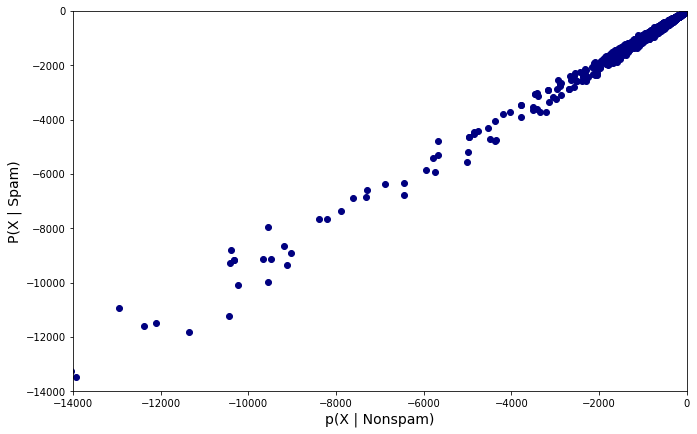

In [42]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

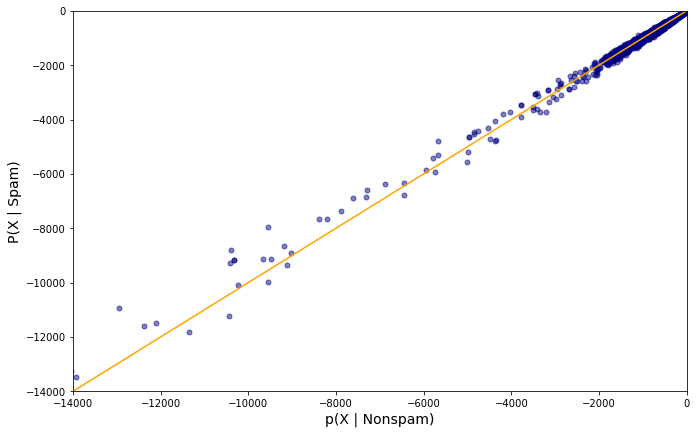

In [45]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

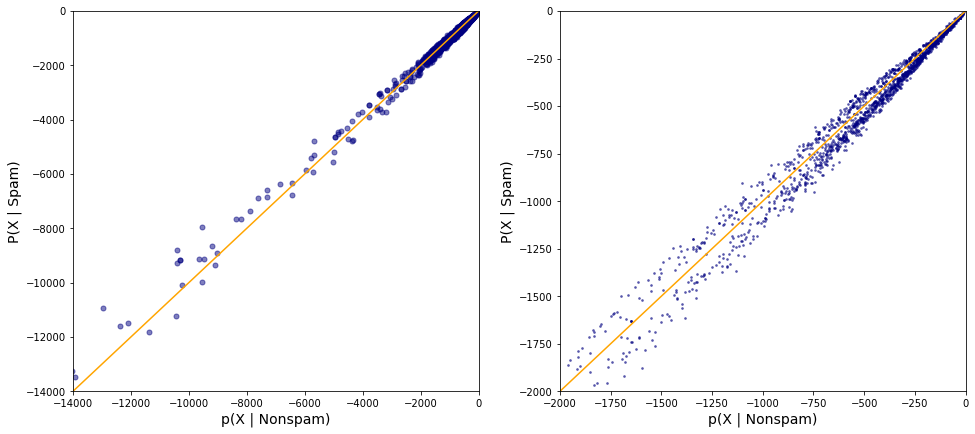

In [48]:
plt.figure(figsize=(16, 7))

#Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set Scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [49]:
# Using Seaborn
sns.set_style('whitegrid')
labels = 'Actual Category'

# As seaborn works better with DataFrames we are creating a Pandas DataFrame.
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

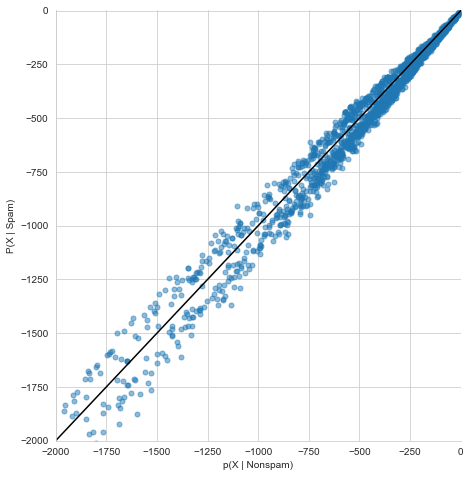

In [58]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

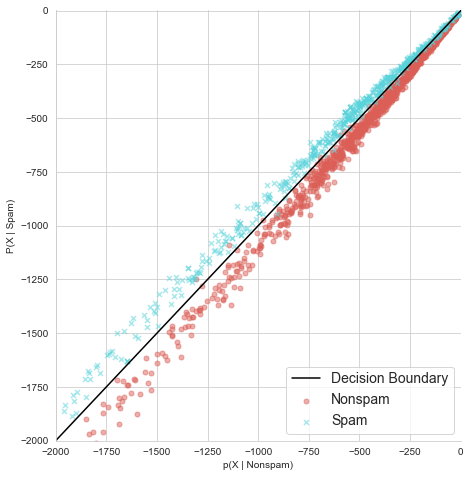

In [67]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

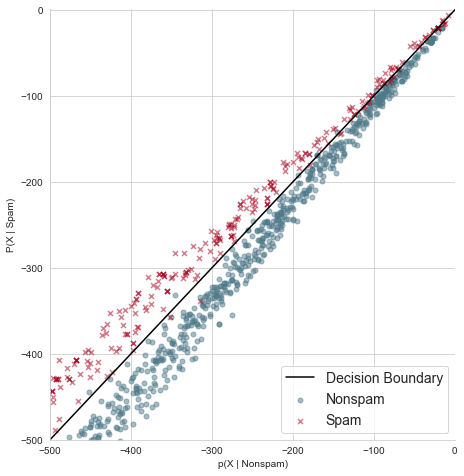

In [74]:
my_colours = ['#4E7989', '#A9011B']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [75]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [76]:
true_pos = (y_test == 1) & (prediction == 1) # &&would give one boolean answer for the entire set while & will do each element.


In [77]:
true_pos.sum()

569

In [78]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [88]:
false_pos = (y_test == 0) & (prediction == 1)


In [89]:
false_pos.sum()

19

In [94]:
false_neg = (y_test == 1) & (prediction == 0)


In [95]:
false_neg.sum()

20

# Recall Score

In [106]:
recall_score = (true_pos.sum()) / (true_pos.sum() + false_neg.sum())
print('Model recall score is {:.2%}'.format(recall_score))

Model recall score is 96.60%


# Precision Score

In [108]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Our precision is {:.3}'.format(precision_score))

Our precision is 0.968


# F-Score aka(F1-Score)

In [109]:
f1_score = 2 * ((precision_score * recall_score) / (precision_score + recall_score))
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
